In [1]:
import os
import matplotlib.pyplot as plt 
import cv2 
import tensorflow as tf
from tensorflow.keras.preprocessing import image 

In [2]:
img1=cv2.imread(r'C:\Users\anush\OneDrive\Documents\Breast Cancer\Dataset_BUSI_with_GT\benign\benign (1).png')
print(img1)

[[[  7   7   7]
  [  2   2   2]
  [  4   4   4]
  ...
  [197 197 197]
  [184 184 184]
  [176 176 176]]

 [[198 198 198]
  [ 45  45  45]
  [  0   0   0]
  ...
  [200 200 200]
  [191 191 191]
  [183 183 183]]

 [[212 212 212]
  [ 45  45  45]
  [  9   9   9]
  ...
  [207 207 207]
  [203 203 203]
  [194 194 194]]

 ...

 [[ 25  25  25]
  [ 24  24  24]
  [ 23  23  23]
  ...
  [ 22  22  22]
  [ 27  27  27]
  [ 26  26  26]]

 [[ 24  24  24]
  [ 23  23  23]
  [ 23  23  23]
  ...
  [ 30  30  30]
  [ 32  32  32]
  [ 31  31  31]]

 [[ 26  26  26]
  [ 25  25  25]
  [ 25  25  25]
  ...
  [ 34  34  34]
  [ 34  34  34]
  [ 32  32  32]]]


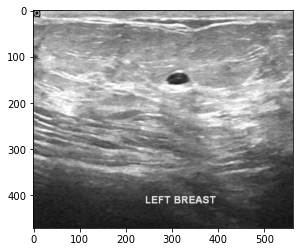

In [3]:
#previewing the image using open cv 
plt.imshow(img1)

In [4]:
#evaluating the size of the image 
print("the shape of the image ")
print(img1.shape)
#so we can see that the image has height=64 px , width=64 px , channel= 3
#so the image is an rgb image

the shape of the image 
(471, 562, 3)


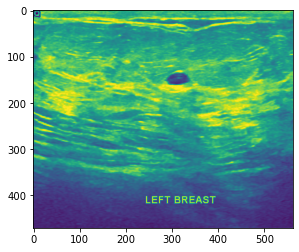

In [5]:
img_gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)

In [6]:
print(img_gray.shape)

(471, 562)


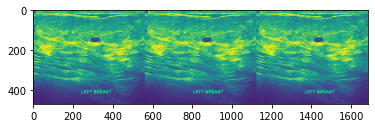

In [7]:
import numpy as np
imgblue=img1[:,:,0]
imggreen=img1[:,:,1]
imgred=img1[:,:,2]
new_image=np.hstack((imgblue,imggreen,imgred))
plt.imshow(new_image)

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [9]:
images_dir = r"C:\Users\anush\OneDrive\Documents\Breast Cancer\Dataset_BUSI_with_GT"

In [10]:
batch_size = 32
img_height = 300
img_width = 300

In [11]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  images_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1578 files belonging to 3 classes.
Using 1263 files for training.


In [12]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  images_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1578 files belonging to 3 classes.
Using 315 files for validation.


In [13]:
class_names = train_ds.class_names
print(class_names)

['benign', 'malignant', 'normal']


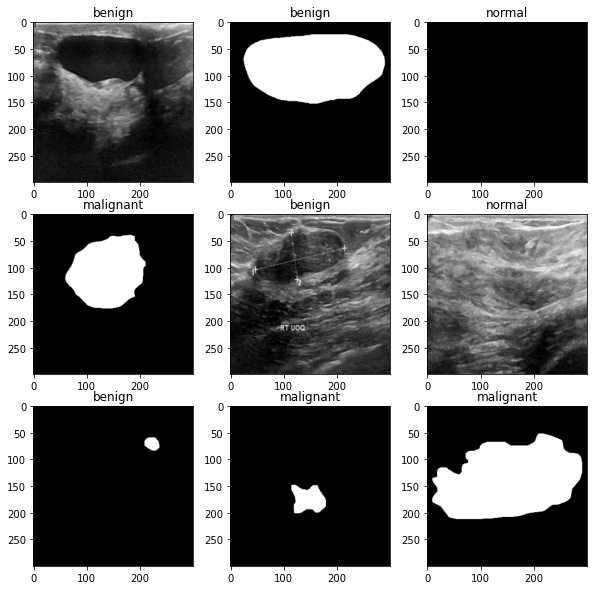

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

In [15]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 300, 300, 3)
(32,)


In [16]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [17]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [18]:
num_classes = 3

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='sigmoid'),
  layers.Dense(3)
])

In [19]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        1

In [21]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
40/40 [==============================] - 66s 2s/step - loss: 0.9337 - accuracy: 0.5360 - val_loss: 0.7749 - val_accuracy: 0.6571
Epoch 2/10
40/40 [==============================] - 62s 2s/step - loss: 0.6239 - accuracy: 0.7245 - val_loss: 0.6970 - val_accuracy: 0.6794
Epoch 3/10
40/40 [==============================] - 61s 2s/step - loss: 0.5221 - accuracy: 0.7767 - val_loss: 0.7486 - val_accuracy: 0.6889
Epoch 4/10
40/40 [==============================] - 59s 1s/step - loss: 0.3569 - accuracy: 0.8424 - val_loss: 0.7820 - val_accuracy: 0.7016
Epoch 5/10
40/40 [==============================] - 63s 2s/step - loss: 0.2268 - accuracy: 0.9145 - val_loss: 0.8652 - val_accuracy: 0.7556
Epoch 6/10
40/40 [==============================] - 59s 1s/step - loss: 0.1574 - accuracy: 0.9493 - val_loss: 1.0730 - val_accuracy: 0.7302
Epoch 7/10
40/40 [==============================] - 58s 1s/step - loss: 0.0868 - accuracy: 0.9770 - val_loss: 1.0706 - val_accuracy: 0.7556
Epoch 8/10
40/40 [==

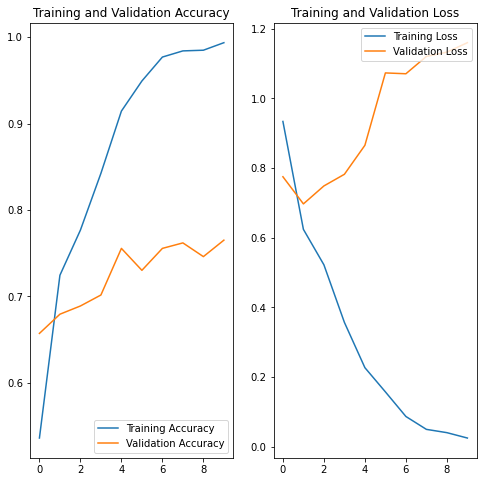

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

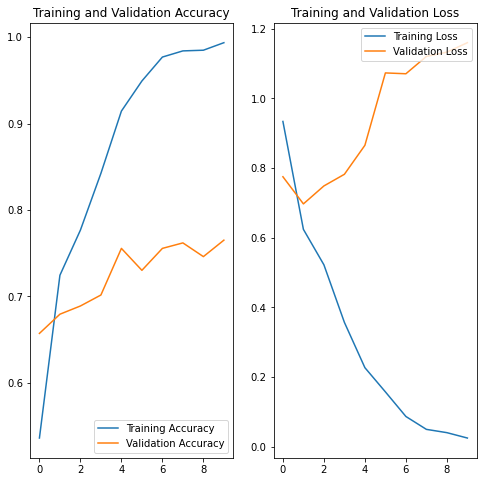

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
test_data = r'C:\Users\anush\OneDrive\Documents\Breast Cancer\Dataset_BUSI_with_GT\benign\benign (1).png'
test_data_path = test_data

img = keras.preprocessing.image.load_img(
    test_data_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 129ms/step
This image most likely belongs to benign with a 99.83 percent confidence.


In [25]:
test_data = r'C:\Users\anush\OneDrive\Documents\Breast Cancer\Dataset_BUSI_with_GT\malignant\malignant (1).png'
test_data_path = test_data

img = keras.preprocessing.image.load_img(
    test_data_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 36ms/step
This image most likely belongs to malignant with a 99.94 percent confidence.


In [26]:
test_data = r'C:\Users\anush\OneDrive\Documents\Breast Cancer\Dataset_BUSI_with_GT\normal\normal (1)_mask.png'
test_data_path = test_data

img = keras.preprocessing.image.load_img(
    test_data_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 41ms/step
This image most likely belongs to normal with a 99.78 percent confidence.
